# AP-v9-4-Data analysis and visualization

In [2]:
import csv
import re
import os

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nltk

import lab_2_1

from typing import List, Dict

from nltk.corpus import stopwords
from pymystem3 import Mystem
from collections import Counter


Функция читает данные датасета и создает DataFrame в формате num mark, text. Строки с невалидными значениями удаляются.

In [4]:
def make_df(path: str) -> pd.DataFrame:
    """Function gets path to dataset and make DataFrame with num mark and text field 

    Args:
        path (str): path to dataset

    Returns:
        pd.DataFrame: ready-made dataset
    """
    if 'paths.csv' not in os.listdir():
        lab_2_1.make_csv(path)
    num_list = []
    text_list = []
    r = open('paths.csv', 'r')
    reader = list(csv.reader(r))
    for item in reader:
        f = open(item[0], 'r', encoding='utf-8')
        text = f.read()
        num_list.append(item[2])
        text_list.append(text)
    d = {'num': num_list, 'text': text_list}
    df1 = pd.DataFrame(data=d)
    df1 = df1.dropna()
    return df1

df = make_df('dataset')
print(df)

     num                                               text
0      1  Заказывал четыре кресло для салона в 2 сентябр...
1      1  Вайбериз- это бандитская организация. Заказала...
2      1  Доброго времени суток! Тем кто читает данный т...
3      1  Приветствую! Я уже 4 года активно заказываю на...
4      1  Добрый день! Столкнулась с платформой Вайлдбер...
...   ..                                                ...
4995   5  В последнее время, во время изоляции, я нашла ...
4996   5  Давно пользуюсь услугами данного маркетплейса,...
4997   5  Интернет магазин отличный! пользуюсь им на про...
4998   5  Очень крутой сайт и приложение, открыла для се...
4999   5  Добрый день! Не понимаю, за что так ругают это...

[5000 rows x 2 columns]


Функция добавляет в DataFrame стобец содержащий информацию о кол-ве слов в ячейке 'text'

In [5]:
def text_update(text: str) -> List[str]:
    """Function remove from text punctuation marks and split it

    Args:
        text (str): text for update

    Returns:
        List[str]: List with words from text
    """
    text = re.sub(r"[^\w\s]", "", text)
    text = text.split()
    return text


def add_word_count(df: pd.DataFrame) -> None:
    """Function add to DataFrame column with word count information 

    Args:
        df (pd.DataFrame): DataFrame to edit
    """
    df['word_count'] = 0
    for i in range(len(df)):
        df.iloc[i, 2] = len(text_update(df.iloc[i, 1]))


add_word_count(df)
print(df)

     num                                               text  word_count
0      1  Заказывал четыре кресло для салона в 2 сентябр...          83
1      1  Вайбериз- это бандитская организация. Заказала...          95
2      1  Доброго времени суток! Тем кто читает данный т...         127
3      1  Приветствую! Я уже 4 года активно заказываю на...         255
4      1  Добрый день! Столкнулась с платформой Вайлдбер...         437
...   ..                                                ...         ...
4995   5  В последнее время, во время изоляции, я нашла ...          75
4996   5  Давно пользуюсь услугами данного маркетплейса,...         107
4997   5  Интернет магазин отличный! пользуюсь им на про...          91
4998   5  Очень крутой сайт и приложение, открыла для се...          23
4999   5  Добрый день! Не понимаю, за что так ругают это...         124

[5000 rows x 3 columns]


Функция вычисляет среднее кол-во слов для каждой метки класса

In [6]:
def stats_by_word_count(df: pd.DataFrame) -> pd.DataFrame:
    """Function make DataFrame with information about average number of word to every mark

    Args:
        df (pd.DataFrame): DataFrame with text information

    Returns:
        pd.DataFrame: DataFrame num mark: word count
    """
    return df[["num", "word_count"]].groupby("num").mean()


stat_df = stats_by_word_count(df)
print(stat_df)

     word_count
num            
1       210.682
2       179.693
3       165.844
4       194.616
5       169.618


Функция фильтрует DataFrame по кол-ву слов(<= max_count)

In [7]:
def sort_by_word_count(df: pd.DataFrame, max_count: int) -> pd.DataFrame:
    """The function creates a dataframe by removing lines with a word count exceeding max count

    Args:
        df (pd.DataFrame): DataFrame with text information
        max_count (int): max count of words count

    Returns:
        pd.DataFrame: DataFrame with a word count exceeding max count
    """
    new_df = df.loc[df['word_count'] <= max_count]
    return new_df


sorted_df = sort_by_word_count(df, 100)
print(sorted_df)

     num                                               text  word_count
0      1  Заказывал четыре кресло для салона в 2 сентябр...          83
1      1  Вайбериз- это бандитская организация. Заказала...          95
8      1  Заказал аккумулятор на телефон. Связаться до з...          73
9      1  Заказывал через валдберриз, пришел товар на 2 ...          42
10     1  Заказали чашку в подарок за 385 р пришла разби...          99
...   ..                                                ...         ...
4992   5  Я очень часто бываю на праздниках и всегда был...          97
4994   5  Очень нравится этот интернет-магазин, много че...          24
4995   5  В последнее время, во время изоляции, я нашла ...          75
4997   5  Интернет магазин отличный! пользуюсь им на про...          91
4998   5  Очень крутой сайт и приложение, открыла для се...          23

[1506 rows x 3 columns]


Функция фильтрует DataFrame по метке класса 

In [8]:
def sort_by_num(df: pd.DataFrame, num: str) -> pd.DataFrame:
    """Function sorts DataFrame by the num mark

    Args:
        df (pd.DataFrame): DataFrame to sort
        num (str): num mark 

    Returns:
        pd.DataFrame: sorted DataFrame
    """
    new_df = df.loc[df['num'] == num]
    return new_df

df_num5 = sort_by_num(df, '5')
print(df_num5)

     num                                               text  word_count
4000   5  Приветствую Вас дорогие друзья и читатели!Я зн...         445
4001   5  Всем прекрасного и отличного дня, друзья!Сегод...         312
4002   5  Наверное уже с полгода заказываю на сайте комп...         145
4003   5  Всем большой привет!Нечасто я покупаю себе как...        1226
4004   5  Всем хорошего дня. Хочу сегодня поделиться с в...         329
...   ..                                                ...         ...
4995   5  В последнее время, во время изоляции, я нашла ...          75
4996   5  Давно пользуюсь услугами данного маркетплейса,...         107
4997   5  Интернет магазин отличный! пользуюсь им на про...          91
4998   5  Очень крутой сайт и приложение, открыла для се...          23
4999   5  Добрый день! Не понимаю, за что так ругают это...         124

[1000 rows x 3 columns]


Функция группирует DataFrame по метке класса и вычисляет минимальное, максимальное и среднее кол-во слов 

In [9]:
def group_by_num(df: pd.DataFrame) -> pd.DataFrame:
    """The function groups the dataframe by class label and 
    calculates the minimum and maximum number of words in the text

    Args:
        df (pd.DataFrame): DataFrame with text information

    Returns:
        pd.DataFrame: groupped DataFrame
    """
    num = []
    max = []
    min = []
    mean = []
    groupped_d = {'num': num, 'max': max, 'min': min, 'mean': mean}
    for i in range(1, 6):
        num.append(str(i))
        max.append((df.loc[df['num'] == str(i)]
                   [['word_count']].max()).loc['word_count'])
        min.append((df.loc[df['num'] == str(i)]
                   [['word_count']].min()).loc['word_count'])
        mean.append((df.loc[df['num'] == str(i)]
                    [['word_count']].mean()).loc['word_count'])
    groupped_df = pd.DataFrame(data=groupped_d)
    return groupped_df


groupped_df = group_by_num(df)
print(groupped_df)

  num   max  min     mean
0   1  1305   15  210.682
1   2  1315   19  179.693
2   3  1440   20  165.844
3   4  2386   18  194.616
4   5  1262   13  169.618


Функция лемматизирует текст с использованием библиотеки nltk и pymystem3
1) Выборка среди всех слов
2) Выборка среди прилагательных и наречий 

In [10]:
mystem = Mystem()
russian_stopwords = stopwords.words("russian")


def preprocess_text(text: str) -> List[str]:
    """Function gets text, lemmatize them and removes stopwords

    Args:
        text (str): text for preprocess 

    Returns:
        List[str]: preprocessed text
    """
    tokens = mystem.lemmatize(text.lower())
    tokens = [token for token in tokens if token not in russian_stopwords and token != " "]
    return tokens


def preprocess_text_only_A(text: str) -> List[str]:
    """Function gets text, lemmatize them and removes all word without adjective and adverb

    Args:
        text (str): text for preprocess

    Returns:
        List[str]: preprocessed text
    """
    tokens = mystem.lemmatize(text.lower())
    tokens = [token for token in tokens if token not in russian_stopwords]
    text = " ".join(tokens)
    words = nltk.word_tokenize(text)
    functors_pos = {'A=m', 'ADV'}
    res = [word for word, pos in nltk.pos_tag(words, lang='rus')
           if pos in functors_pos]
    return res


print(preprocess_text('Мороз и солнце день чудесный Еще ты дремлешь друг прелестный Пора красавица проснись Открой сомкнуты негой взор'))
print(preprocess_text_only_A('Мороз и солнце день чудесный Еще ты дремлешь друг прелестный Пора красавица проснись Открой сомкнуты негой взор'))

['мороз', 'солнце', 'день', 'чудесный', 'дремать', 'друг', 'прелестный', 'пора', 'красавица', 'просыпаться', 'открывать', 'смыкать', 'нега', 'взор', '\n']
['чудесный', 'прелестный']


Фунция принимает список лемматизированных слов и с помощью Counter считает кол-во их повторений, создавая словарь слово:кол-во повторений

Пример для 5 отзывов

In [13]:
def make_histogram(df: pd.DataFrame, num: str) -> Dict[str, int]:
    """Function make dictionary word: count by num marks for making histogram
    Args:
        df (pd.DataFrame): DataFrame with text information
        num (str): num mark 

    Returns:
        Dict[str, int]: dictionary word: count in num marks text
    """
    res = []
    lenght = len(df.loc[df['num'] == num]['text'])
    for i in range(5):
        text = df.loc[df['num'] == num]['text'].iloc[i]
        text = preprocess_text_only_A(text)
        res += text
    res = dict(Counter(res))
    res = sorted(res.items(), key=lambda item: item[1], reverse=True)
    res = res[0:30]
    return res

hist = make_histogram(df, "1")
print(hist)

[('вообще', 3), ('личный', 3), ('далее', 3), ('нормальный', 2), ('очень', 2), ('добрый', 2), ('далеко', 2), ('следующий', 2), ('компетентный', 1), ('бандитский', 1), ('сразу', 1), ('логистический', 1), ('удобный', 1), ('давний', 1), ('вполне', 1), ('обычный', 1), ('подходящий', 1), ('быстро', 1), ('расстроенный', 1), ('буто', 1), ('простой', 1), ('должный', 1), ('честно', 1), ('активно', 1), ('различный', 1), ('недавний', 1), ('банковский', 1), ('несколько', 1), ('разный', 1), ('последний', 1)]


Функция строит гистограмму ось X - кол-во слов, ось Y - слово

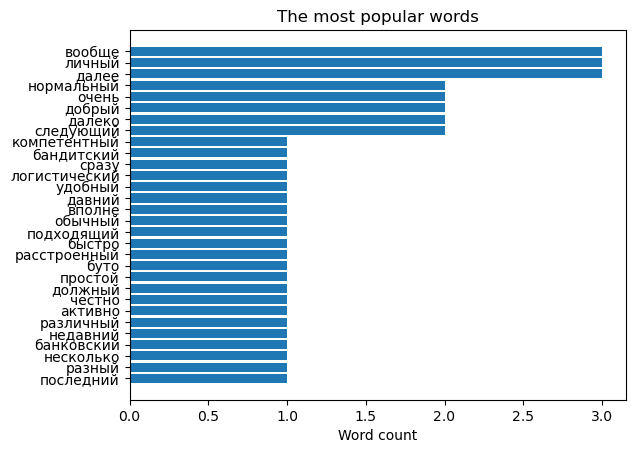

In [15]:
def graph_build(hist_list: Dict[str, int]) -> None:
    """Function make plot with matplotlib x-axe is word count y-axe is word

    Args:
        hist_list (Dict[str, int]): dictionary word: num mark
    """
    words = []
    count = []
    for i in range(len(hist_list)):
        words.append(hist_list[i][0])
        count.append(hist_list[i][1])

    fig, ax = plt.subplots()

    y_pos = np.arange(len(words))

    ax.barh(y_pos, count, align='center')
    ax.set_yticks(y_pos, labels=words)
    ax.invert_yaxis()
    ax.set_xlabel('Word count')
    ax.set_title('The most popular words')

    plt.show()



graph_build(hist)